In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### 1. Gunakan Data 'Mall Customers.csv'

In [3]:
df = pd.read_csv("../data/Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Cek apakah ada data yang kosong
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

### 2. Tentukan fitur apa yang tepat untuk melaukan clustering

In [5]:
df.drop(['CustomerID'], axis=1, inplace=True)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


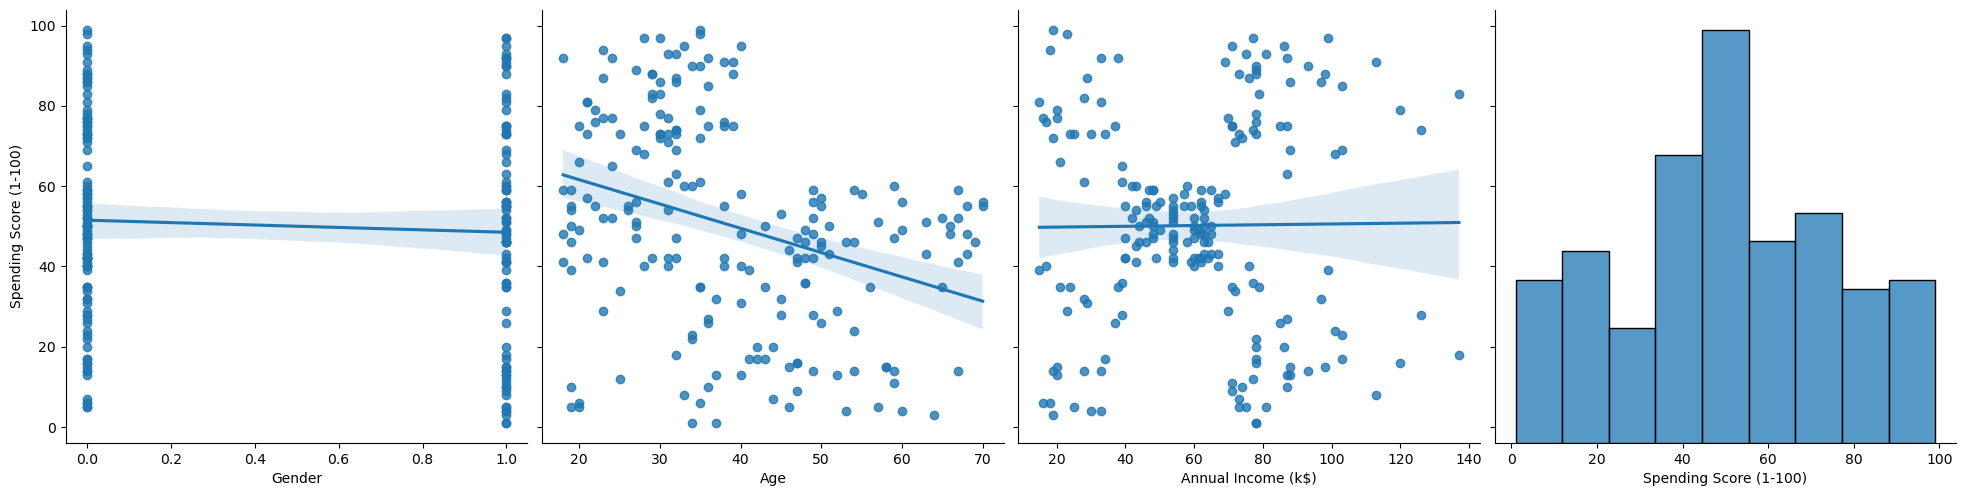

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

sns.pairplot(df,x_vars=df.columns,y_vars=df.columns[-1], height=5, aspect=1, kind='reg')

terlihat dari data yang ada, fitur yang tepat untuk melakukan clustering adalah fitur 'Annual Income (k$)' dan 'Spending Score (1-100)'

sebenarnya fitur 'Age' juga bisa digunakan, namun karena data yang ada tidak terlalu beragam, maka fitur 'Age' tidak digunakan

### 3. Buatlah model K-Means Clustering dengan mempertimbangkan jumlah yang terbaik

In [10]:
# memisahkan data fitur 
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


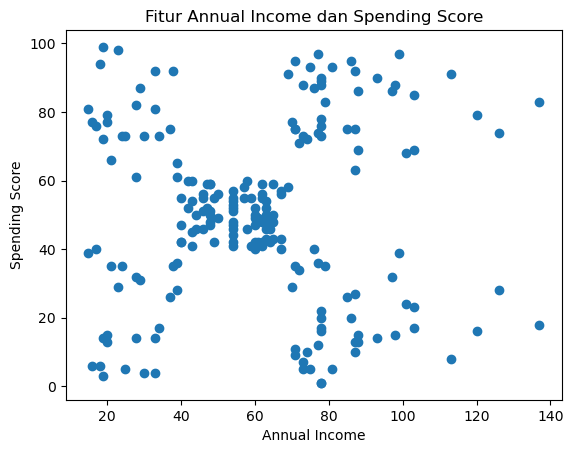

In [12]:
# visualisasi data
plt.title('Fitur Annual Income dan Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.show()

Train model dengan jumlah cluster 2 sampai 10, kemudian pilih jumlah cluster yang terbaik

In [14]:
# training K-Means model
cluster_model = KMeans(n_clusters=2, random_state=10)
labels = cluster_model.fit_predict(X)

print(f'Nilai SSE: {cluster_model.inertia_}')

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Nilai SSE: 181363.595959596


Optimalisasi jumlah cluster menggunakan metode Elbow

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

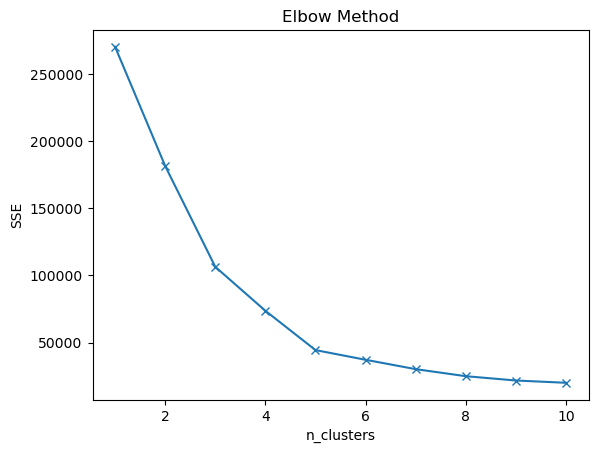

In [16]:
#implementasi metode elbow
sse = []

for i in range(1, 11):
    cluster_model = KMeans(n_clusters=i, random_state=10)
    cluster_model.fit(X)
    sse.append(cluster_model.inertia_)
# buat plot terdapat tanda x pada sse
plt.plot(range(1, 11), sse, 'x-')
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('SSE')
plt.show()

dengan menggunakan metode Elbow, didapatkan jumlah cluster yang optimal adalah 5

In [19]:
# cek nilai SSE setiap cluster

for idx, sse_val in enumerate(sse):
    print(f'Nilai SSE untuk {idx+1} cluster: {sse_val}')


Nilai SSE untuk 1 cluster: 269981.28
Nilai SSE untuk 2 cluster: 181363.595959596
Nilai SSE untuk 3 cluster: 106348.37306211118
Nilai SSE untuk 4 cluster: 73679.78903948836
Nilai SSE untuk 5 cluster: 44448.45544793371
Nilai SSE untuk 6 cluster: 37239.83554245604
Nilai SSE untuk 7 cluster: 30273.394312070042
Nilai SSE untuk 8 cluster: 25038.83620868515
Nilai SSE untuk 9 cluster: 21829.135638779826
Nilai SSE untuk 10 cluster: 20137.434537925845


Optimalisasi jumlah cluster juga dapat menggunakan metode Silhouette

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

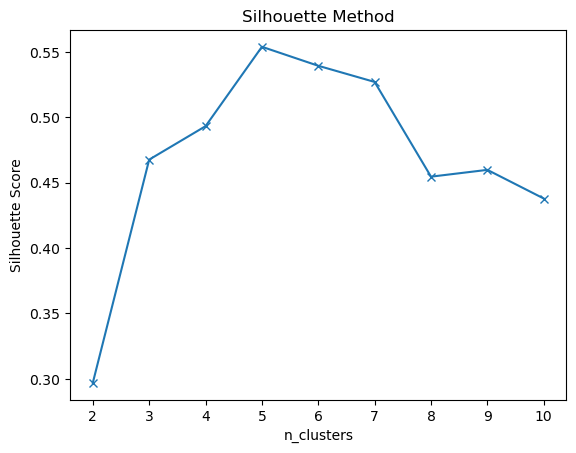

In [20]:
# optimalisasi k dengan silhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    cluster_model = KMeans(n_clusters=i, random_state=10)
    labels = cluster_model.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# buat plot terdapat tanda x pada silhouette score
plt.plot(range(2, 11), silhouette_scores, 'x-')
plt.title('Silhouette Method')
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Score')
plt.show()

dengan menggunakan metode Silhouette, didapatkan jumlah cluster yang optimal adalah 5 dengan nilai Silhouette 0.553931997444648

Retrain model dengan optimal k

In [21]:
from sklearn.cluster import KMeans

# training K-Means model
cluster_model = KMeans(n_clusters=5, random_state=10)
labels = cluster_model.fit_predict(X)


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualisasikan hasil clustering

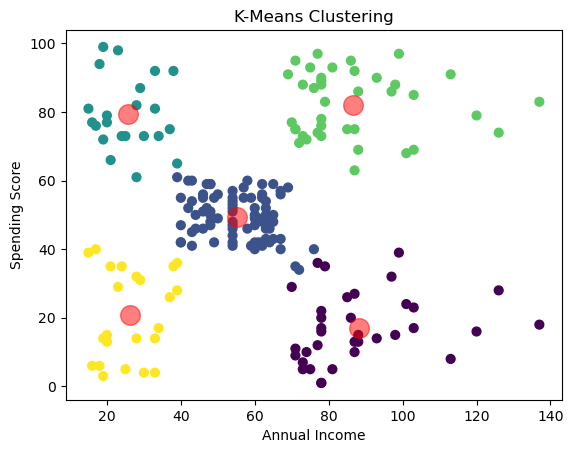

In [29]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40)

centers = cluster_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()